<a href="https://colab.research.google.com/github/MouniriOuma/TP-KMeans-Clustering-on-Credit-Card-Dataset/blob/main/tp3_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install plotly

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def charger_dataset(file):
    return pd.read_csv(file)

# Charger le fichier de données
df = charger_dataset('TP3_dataset.csv')

In [ ]:
def pretraitement_data(df):
    # Sélectionner les variables pertinentes
    selected_columns = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1']
    data = df[selected_columns]

    # Normaliser les données
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(data)

    return data_normalized

# Prétraitement des données
data_normalized = pretraitement_data(df)

In [ ]:
def application_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, max_iter=1000, random_state=42)
    kmeans.fit(data)

    return kmeans, kmeans.labels_

# Application du K-Means
kmeans, labels = application_kmeans(data_normalized, n_clusters=4)

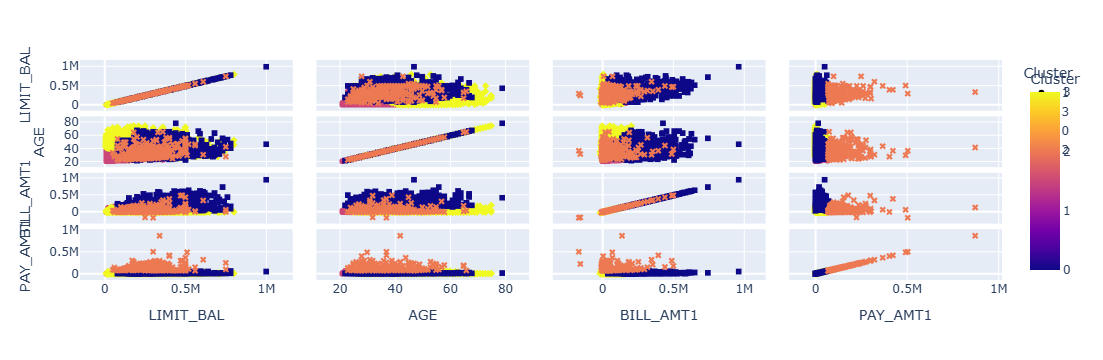

In [ ]:
def visualize_clusters(data, labels, df):
    # Ajouter les labels de clusters au DataFrame original pour la visualisation
    df['Cluster'] = labels
    fig = px.scatter_matrix(df, dimensions=['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1'],
                            color='Cluster', symbol='Cluster')
    fig.show()

# Visualiser les clusters
visualize_clusters(data_normalized, labels, df)

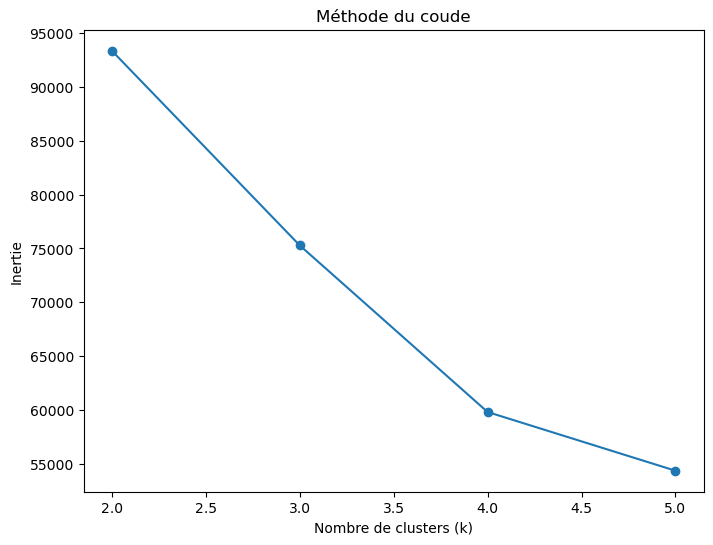

In [ ]:
def evaluation_clustering(data):
    inertias = []
    cluster_range = range(2, 6)

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    # Visualiser la méthode du coude
    plt.figure(figsize=(8, 6))
    plt.plot(cluster_range, inertias, marker='o')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("Inertie")
    plt.title("Méthode du coude")
    plt.show()

# Évaluer la qualité du clustering
evaluation_clustering(data_normalized)
